In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras_preprocessing
!pip install split-folders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
import os
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import keras_preprocessing
from PIL import Image
from keras_preprocessing.image import ImageDataGenerator
#from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input
#from tensorflow.keras.applications import Xception, InceptionV3, ResNet152V2

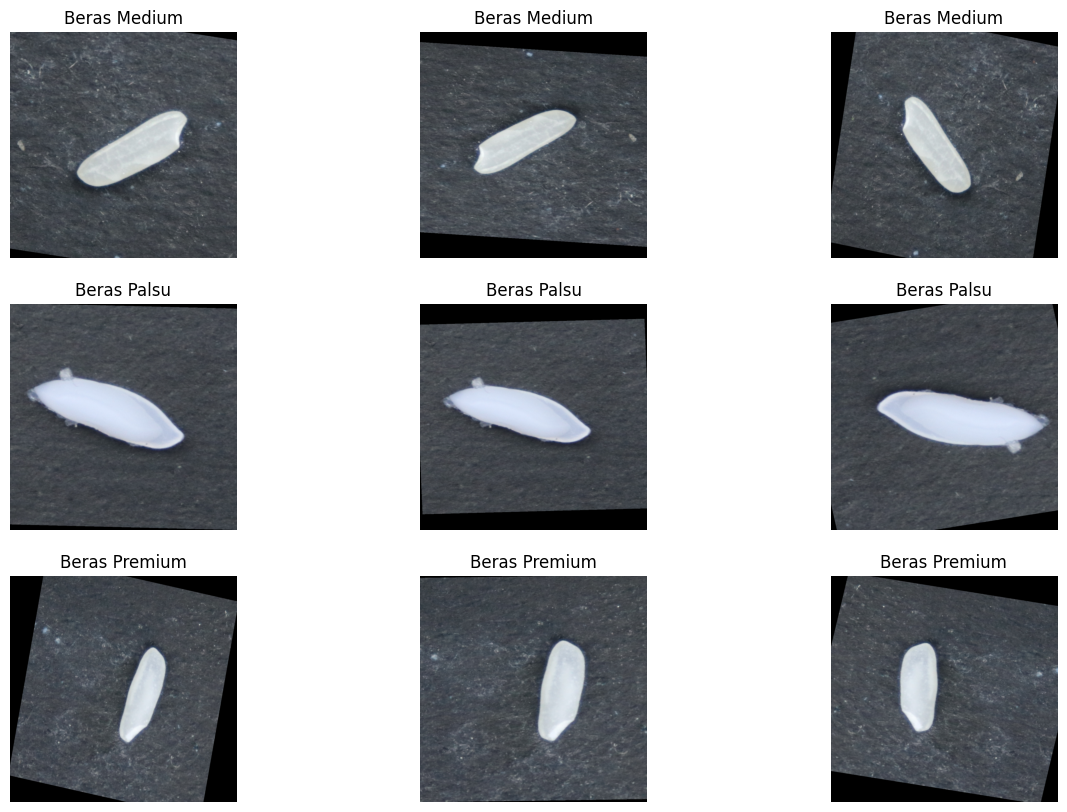

In [ ]:
dataset_dir = '/content/drive/MyDrive/SKRIPSI_2/New_Dataset/Hasil augmentasi'
classes = os.listdir(dataset_dir)
plt.figure(figsize=(15,10))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)
    img_paths = [os.path.join(class_dir, img) for img in os.listdir(class_dir)[:3]]  # Mengambil 3 gambar pertama dari setiap kelas

    for j, img_path in enumerate(img_paths):
        img = Image.open(img_path)
        plt.subplot(len(classes), 3, i * 3 + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")

plt.show()

In [ ]:
save_dir = '/content/drive/MyDrive/SKRIPSI_2/New_Dataset/Splitdata/'
splitfolders.ratio(dataset_dir, output=save_dir, seed=1337, ratio=(.7, .2, .1))

train_dir = os.path.join(save_dir, 'train')
val_dir = os.path.join(save_dir, 'val')
test_dir = os.path.join(save_dir, 'test')

Copying files: 6876 files [10:10, 11.26 files/s]


In [ ]:
train_data = ImageDataGenerator(rescale = 1./255)
# validation_data = ImageDataGenerator(
#     rescale = 1./255
# )
# test_data = ImageDataGenerator(
#     rescale = 1./255
# )

In [ ]:
train_generator = train_data.flow_from_directory(
                  train_dir,
                  target_size=(128, 128),
                  batch_size=32,
                  class_mode='categorical',
                  color_mode='rgb')
validation_generator = train_data.flow_from_directory(
         val_dir,
         target_size=(128, 128),
         batch_size=32,
         color_mode= 'rgb',
         class_mode='categorical')
test_generator = train_data.flow_from_directory(
         test_dir,
         target_size=(128,128),
         batch_size=32,
         color_mode = 'rgb',
         class_mode='categorical')

Found 4812 images belonging to 3 classes.
Found 1374 images belonging to 3 classes.
Found 690 images belonging to 3 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs= {}):
    if(logs.get('accuracy') >= 0.98):
      print ("accuracy sudah mencapai 98%")
      self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(3, activation = 'softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile (loss = 'categorical_crossentropy',
               optimizer = optimizer,
               metrics = ['accuracy'])

In [ ]:
history = model.fit (
    train_generator,
    epochs=50,
    validation_data= validation_generator,
    batch_size = 32,
    callbacks = [myCallback()]
)

Epoch 1/50
151/151 [==============================] - 549s 4s/step - loss: 1.0212 - accuracy: 0.4813 - val_loss: 0.8740 - val_accuracy: 0.6012
Epoch 2/50
151/151 [==============================] - 534s 4s/step - loss: 0.7189 - accuracy: 0.6748 - val_loss: 0.5410 - val_accuracy: 0.7533
Epoch 3/50
151/151 [==============================] - 531s 4s/step - loss: 0.4959 - accuracy: 0.7604 - val_loss: 0.4419 - val_accuracy: 0.7707
Epoch 4/50
151/151 [==============================] - 527s 3s/step - loss: 0.4042 - accuracy: 0.8047 - val_loss: 0.3597 - val_accuracy: 0.8202
Epoch 5/50
151/151 [==============================] - 524s 3s/step - loss: 0.3579 - accuracy: 0.8310 - val_loss: 0.3042 - val_accuracy: 0.8661
Epoch 6/50
151/151 [==============================] - 466s 3s/step - loss: 0.3315 - accuracy: 0.8464 - val_loss: 0.2893 - val_accuracy: 0.8617
Epoch 7/50
151/151 [==============================] - 519s 3s/step - loss: 0.3120 - accuracy: 0.8549 - val_loss: 0.2910 - val_accuracy: 0.8486

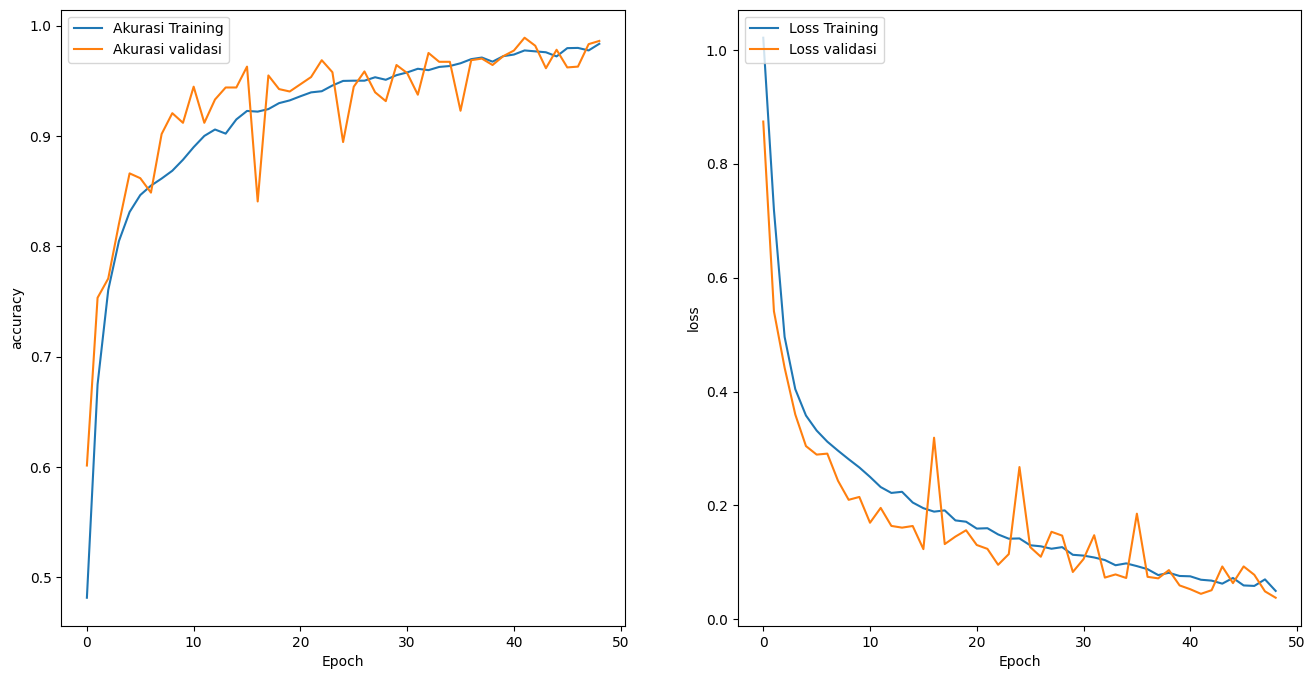

In [ ]:
%matplotlib inline

import matplotlib.image as mimg
import matplotlib.pyplot as plt

acc = (history.history['accuracy'])
val_acc = (history.history['val_accuracy'])
loss = (history.history['loss'])
val_loss = (history.history['val_loss'])

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)

plt.plot(acc, label = 'Akurasi Training')
plt.plot(val_acc, label = 'Akurasi validasi')
plt.title = ('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'upper left')

plt.subplot(1,2,2)
plt.plot(loss, label = 'Loss Training')
plt.plot(val_loss, label = 'Loss validasi')
plt.title = ('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc = 'upper left')

plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator, batch_size = 32)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

22/22 [==============================] - 44s 2s/step - loss: 0.0411 - accuracy: 0.9870
Loss: 0.04108625650405884
Accuracy: 0.9869565367698669


In [ ]:
model.save('model_uji_coba.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
